In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [6]:
# 1. Look at the first few rows
print("--- First 5 Rows ---")
print(df.head())

--- First 5 Rows ---
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies

In [7]:
# 2. Get a summary of the dataframe
print("\n--- Data Info ---")
df.info()


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 

In [8]:
# 3. Get descriptive statistics for numerical columns
print("\n--- Numerical Summary ---")
print(df.describe())



--- Numerical Summary ---
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [9]:
# 4. Check the distribution of our target variable 'Churn'
print("\n--- Churn Distribution ---")
print(df['Churn'].value_counts(normalize=True))


--- Churn Distribution ---
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [13]:
# Create a copy to work on, preserving the original dataframe
df_clean = df.copy()

# Convert 'TotalCharges' to a numeric type. 'coerce' will turn any non-numeric values into NaN.
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

# Check how many missing values were created
print(f"Number of missing values in TotalCharges: {df_clean['TotalCharges'].isnull().sum()}")


Number of missing values in TotalCharges: 11


In [14]:
# Impute (fill) the missing values with the median of the column
median_val = df_clean['TotalCharges'].median()
df_clean['TotalCharges'].fillna(median_val, inplace=True)

print("Missing values handled.")

Missing values handled.


C:\Users\mayan\AppData\Local\Temp\ipykernel_20004\472201615.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['TotalCharges'].fillna(median_val, inplace=True)


In [15]:
# Drop the customerID column as it's just an identifier
df_clean.drop('customerID', axis=1, inplace=True)

In [16]:
# Convert all remaining categorical columns to numeric
# We'll use pandas' get_dummies() which is great for this
# It automatically handles binary and multi-value columns
df_processed = pd.get_dummies(df_clean, drop_first=True) # drop_first=True avoids multicollinearity

# 'Churn_Yes' is our new target column after encoding. Let's rename it for clarity.
df_processed.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)


# --- Final Check ---
print("\n--- Data Info After Cleaning ---")
df_processed.info()

print("\n--- First 5 Rows of Processed Data ---")
print(df_processed.head())


--- Data Info After Cleaning ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   gender_Male                            7043 non-null   bool   
 5   Partner_Yes                            7043 non-null   bool   
 6   Dependents_Yes                         7043 non-null   bool   
 7   PhoneService_Yes                       7043 non-null   bool   
 8   MultipleLines_No phone service         7043 non-null   bool   
 9   MultipleLines_Yes                      7043 non-null   bool   
 10  InternetService_Fiber optic           

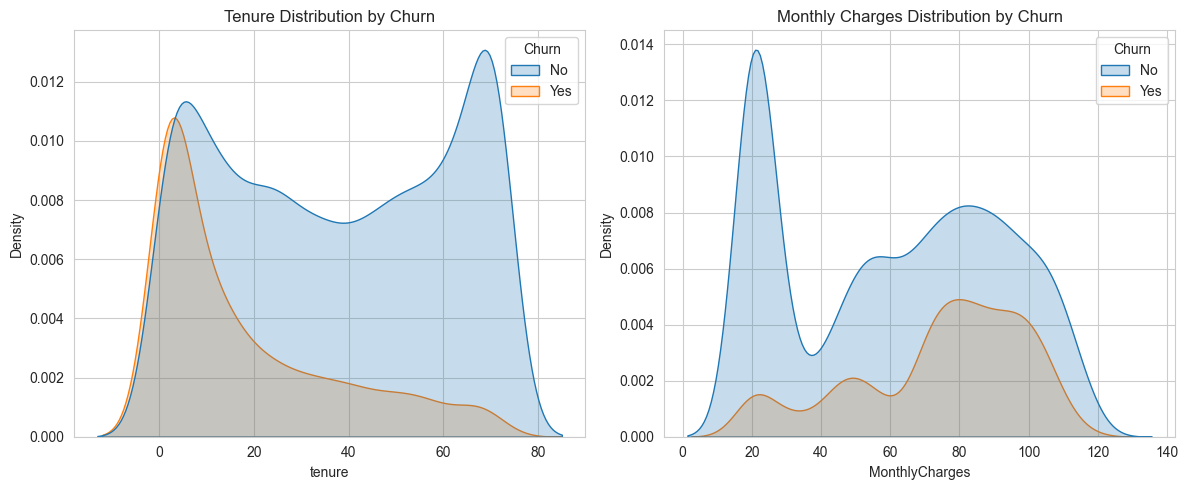

In [17]:
# Set the style for the plots
sns.set_style('whitegrid')

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for Tenure
sns.kdeplot(data=df_clean, x='tenure', hue='Churn', fill=True, ax=axes[0])
axes[0].set_title('Tenure Distribution by Churn')

# Plot for Monthly Charges
sns.kdeplot(data=df_clean, x='MonthlyCharges', hue='Churn', fill=True, ax=axes[1])
axes[1].set_title('Monthly Charges Distribution by Churn')

plt.tight_layout()
plt.show()

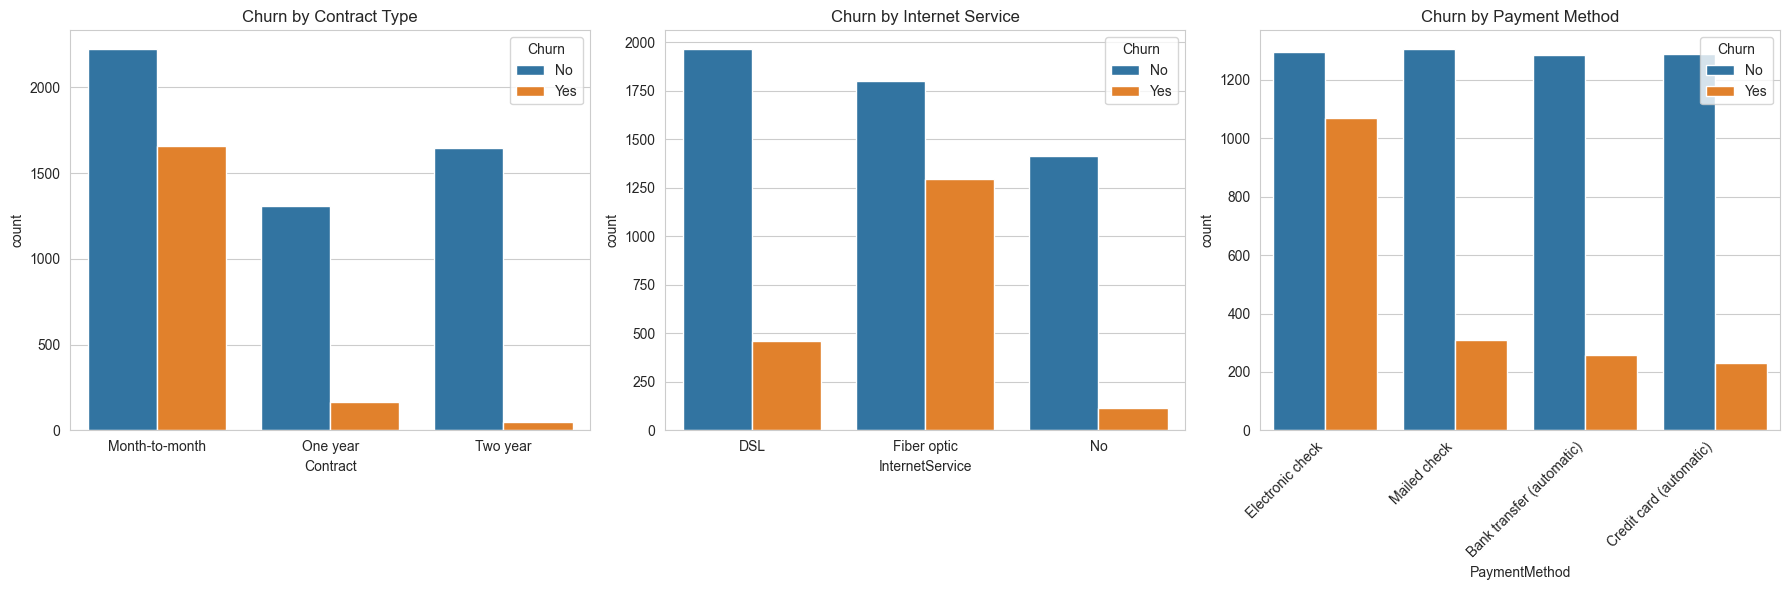

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for Contract type
sns.countplot(data=df_clean, x='Contract', hue='Churn', ax=axes[0])
axes[0].set_title('Churn by Contract Type')

# Plot for Internet Service
sns.countplot(data=df_clean, x='InternetService', hue='Churn', ax=axes[1])
axes[1].set_title('Churn by Internet Service')

# Plot for Payment Method
sns.countplot(data=df_clean, x='PaymentMethod', hue='Churn', ax=axes[2])
axes[2].set_title('Churn by Payment Method')
plt.xticks(rotation=45, ha='right') # Rotate labels for readability

plt.tight_layout()
plt.show()

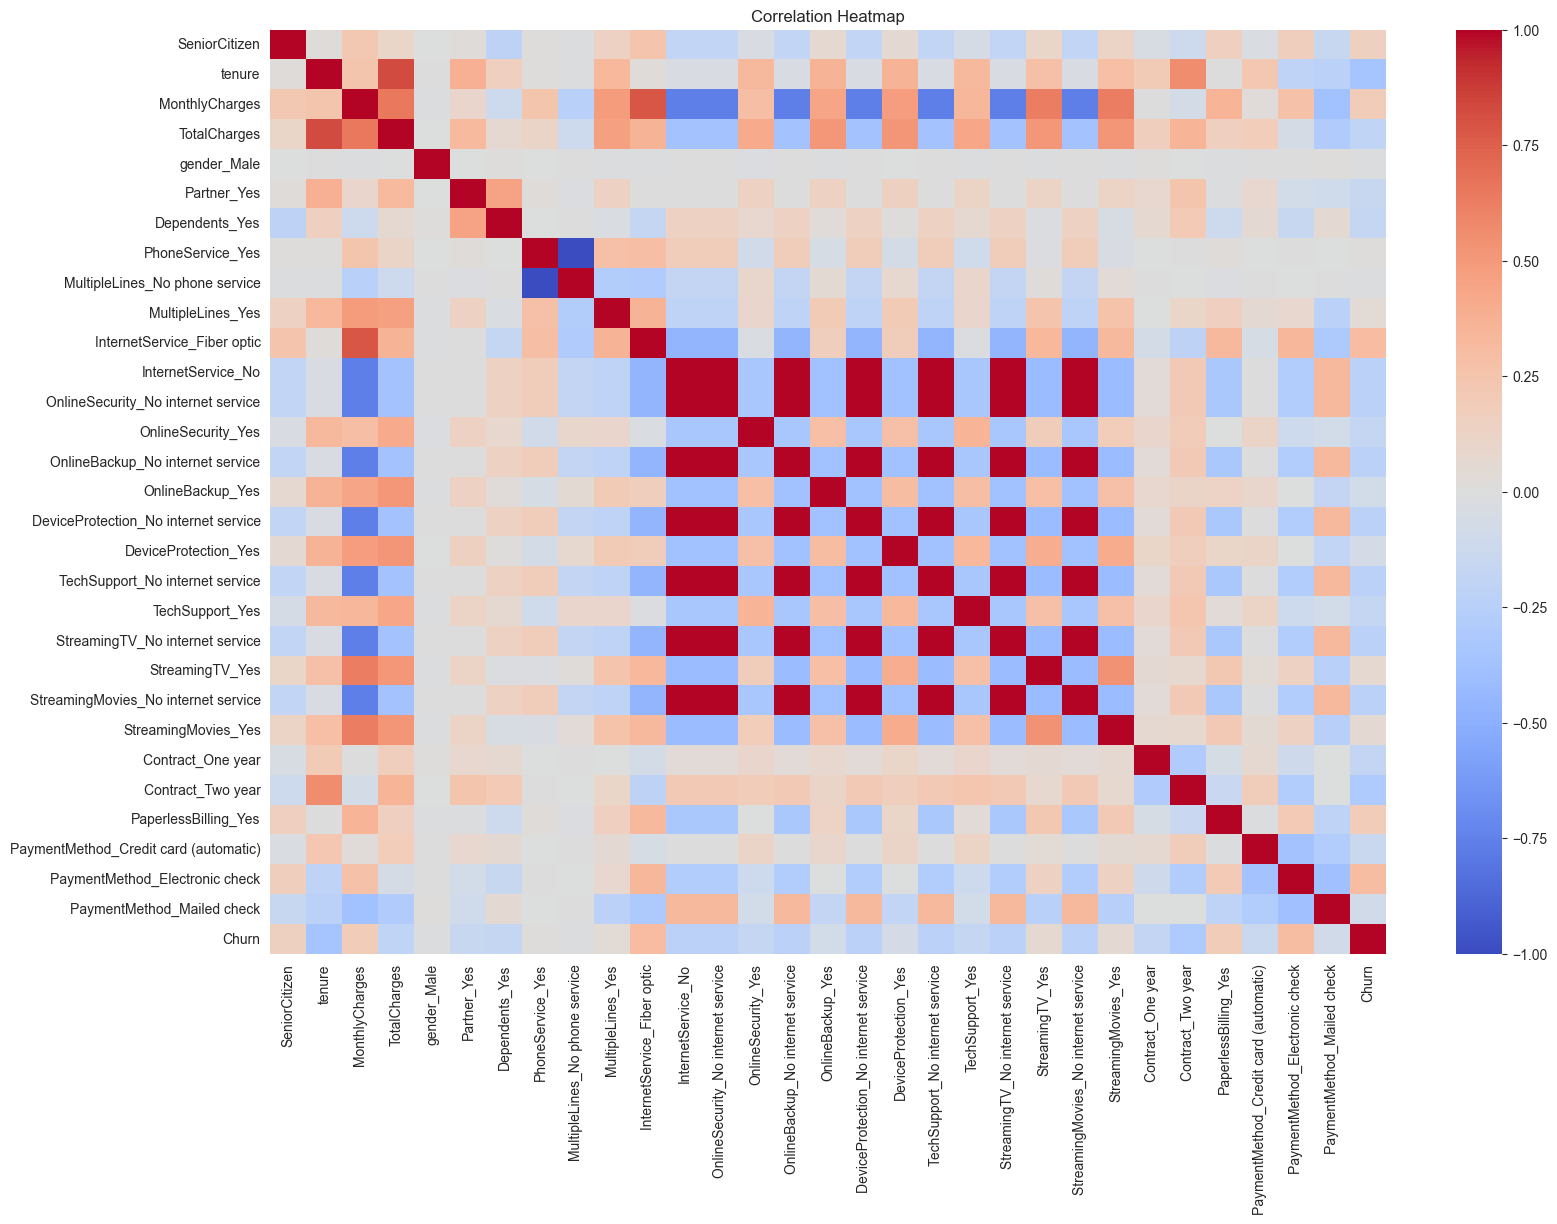

Churn                                    1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling_Yes                     0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService_Yes                         0.011942
gender_Male                             -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner_Yes                             -0.150448
Dependents_Yes                          -0.164221
TechSupport_Yes                         -0.164674
OnlineSecurity_Yes                      -0.171226


In [19]:
plt.figure(figsize=(18, 12))
# We use the processed dataframe here as all features are numeric
corr = df_processed.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# To see the correlations with the Churn column specifically
print(df_processed.corr()['Churn'].sort_values(ascending=False))

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import lightgbm as lgb

In [22]:
# 1. Separate features (X) and target (y)
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

# 2. Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Initialize and train the LightGBM model
lgbm = lgb.LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = lgbm.predict(X_test)
y_pred_proba = lgbm.predict_proba(X_test)[:, 1] # Probabilities for the positive class


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328


Accuracy: 0.8013
ROC AUC Score: 0.8349

--- Classification Report ---
              precision    recall  f1-score   support

       False       0.84      0.89      0.87      1035
        True       0.65      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409


--- Confusion Matrix ---


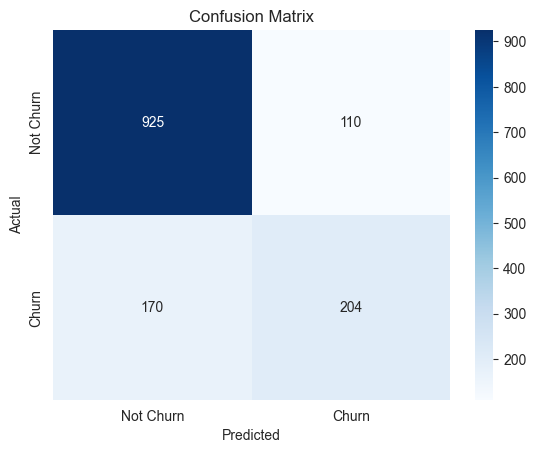

In [23]:
# --- 5. Evaluate the Model ---

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [25]:
import xgboost as xgb

# 1. Initialize and train the XGBoost model
# We add `use_label_encoder=False` and `eval_metric` to align with modern XGBoost versions
xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)

# 2. Make predictions
y_pred_xgb = xgb_clf.predict(X_test)
y_pred_proba_xgb = xgb_clf.predict_proba(X_test)[:, 1]

# --- 3. Evaluate the XGBoost Model ---
print("--- XGBoost Evaluation ---")
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"ROC AUC Score: {roc_auc_xgb:.4f}")
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred_xgb))

e:\study\Churn-Prediction\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:18:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- XGBoost Evaluation ---
Accuracy: 0.7850
ROC AUC Score: 0.8214

--- Classification Report ---
              precision    recall  f1-score   support

       False       0.84      0.88      0.86      1035
        True       0.61      0.53      0.57       374

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



In [26]:
from sklearn.neural_network import MLPClassifier

# 1. Create a pipeline that scales the data then applies the MLPClassifier
# We increase max_iter to ensure the model has enough time to converge
pipeline_mlp = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(random_state=42, max_iter=500, hidden_layer_sizes=(100, 50)))
])

# 2. Train the pipeline
pipeline_mlp.fit(X_train, y_train)

# 3. Make predictions
y_pred_mlp = pipeline_mlp.predict(X_test)
y_pred_proba_mlp = pipeline_mlp.predict_proba(X_test)[:, 1]

# --- 4. Evaluate the Neural Network Model ---
print("\n--- Neural Network (MLP) Evaluation ---")
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
roc_auc_mlp = roc_auc_score(y_test, y_pred_proba_mlp)
print(f"Accuracy: {accuracy_mlp:.4f}")
print(f"ROC AUC Score: {roc_auc_mlp:.4f}")
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred_mlp))


--- Neural Network (MLP) Evaluation ---
Accuracy: 0.7459
ROC AUC Score: 0.7703

--- Classification Report ---
              precision    recall  f1-score   support

       False       0.81      0.85      0.83      1035
        True       0.52      0.46      0.49       374

    accuracy                           0.75      1409
   macro avg       0.67      0.66      0.66      1409
weighted avg       0.74      0.75      0.74      1409



C:\Users\mayan\AppData\Local\Temp\ipykernel_20004\1849730783.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_accuracies.index, y=model_accuracies.values, palette='viridis')


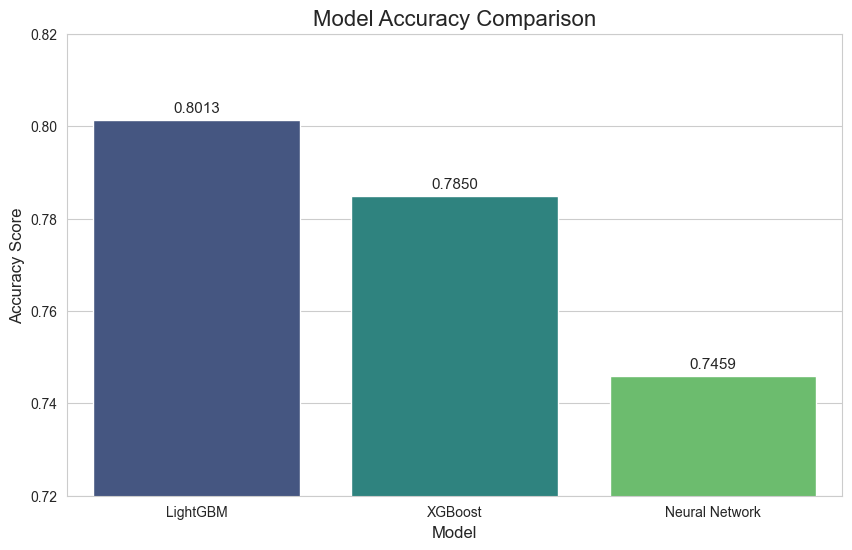

In [31]:
# Data from our previous model evaluations
model_performance = {
    'LightGBM': accuracy,
    'XGBoost': accuracy_xgb,
    'Neural Network': accuracy_mlp
}

# Convert to a pandas Series for easy plotting
model_accuracies = pd.Series(model_performance)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=model_accuracies.index, y=model_accuracies.values, palette='viridis')

# Set the y-axis limit to make differences more apparent
plt.ylim(0.72, 0.82)
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy Score', fontsize=12)
plt.xlabel('Model', fontsize=12)

# Add the accuracy values on top of the bars
for index, value in enumerate(model_accuracies.values):
    plt.text(index, value + 0.001, f'{value:.4f}', ha='center', va='bottom', fontsize=11)

plt.show()

In [32]:
import joblib

# Our final chosen model is 'lgbm'
final_model = lgbm
model_columns = list(X_train.columns)

# Save the model and the column list
joblib.dump(final_model, 'churn_model.joblib')
joblib.dump(model_columns, 'model_columns.joblib')

print("Model and columns saved successfully.")

Model and columns saved successfully.
